### UCLA EC ENGR 219: Large Scale Data Mining Models and Algorithms - Project #1

## Problem 1

QUESTION 1: To get started, plot a histogram of the number of training documents for each
of the 20 categories to check if they are evenly distributed.

## Problem 2

(array([480., 584., 591., 590., 578., 593., 585., 594., 598., 597., 600.,
        595., 591., 594., 593., 599., 546., 564., 465., 377.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 <a list of 20 Patch objects>)

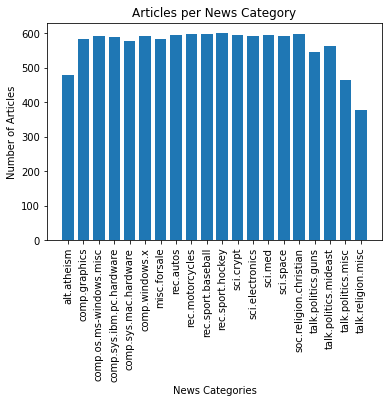

In [3]:
# Have to pip3 install <packages> on local machine before import.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# Downloads and loads training set data ~/scikit_learn_data/20news_home
newsgroups_train = fetch_20newsgroups(subset='train')

# .shape() prints the size/dimensions of the array
newsgroups_train.filenames.shape

# .target is the integer; corresponds to a news-category
# { 0:'alt.atheism', 1:'comp.graphics' ... 19:'talk.religion.misc'}
category_dict = dict(zip(range(20),list(newsgroups_train.target_names)))

# Print Histogram
data = np.array(newsgroups_train.target)

# Center data around integers
d = np.diff(np.unique(data)).min()
left_of_first_bin = data.min() - float(d)/2
right_of_last_bin = data.max() + float(d)/2
bins = np.arange(left_of_first_bin, right_of_last_bin + d, d)

# Plot Labels and Formatting
# Maps .target to .target_names (indexes 0-19)
plt.xticks(range(20),list(newsgroups_train.target_names), rotation='vertical')
plt.title("Articles per News Category")
plt.xlabel("News Categories")
plt.ylabel("Number of Articles")
plt.hist(data, bins, align='mid', rwidth=0.75)


QUESTION 2: Use the following specs to extract features from the textual data:
- Use the “english” stopwords of the CountVectorizer
- Exclude terms that are numbers (e.g. “123”, “-45”, “6.7” etc.)
- Perform lemmatization with nltk.wordnet.WordNetLemmatizer and pos_tag (part-of-speech)
- Use min_df=3
Report the shape of the TF-IDF matrices of the train and test subsets respectively.

In [1]:
# Have to pip3 install <packages> on local machine before import.
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from string import punctuation
from string import digits
from nltk.corpus import wordnet
from sklearn.feature_extraction import text, stop_words

#######################################################
#### Define Custom preprocessor for CountVectorizer ###
#######################################################

def my_custom_preprocessor(doc_string):
    # do all data preprocessinjg here
    
    # Lower case
    doc_string=doc_string.lower()
    
    # Remove Numbers
    remove_digits = str.maketrans('', '', digits)
    doc_string.translate(remove_digits)
    
    # Convert to tokenized form....
    tokens = nltk.tokenize.word_tokenize(doc_string)
    # Iterate through list of tokens (words) and remove all numbers
    tokens = [word for word in tokens if word.isalpha()]
    # Iterate through list of tokens (words) and stem (shorten) each word
    port_stemmer = PorterStemmer()
    tokens = [port_stemmer.stem(words) for words in tokens ]
    
    ###############################
    #### Lemmatize with pos_tag ###
    ###############################
    
    lemmatizer = WordNetLemmatizer()
    
    # Convert between two different tagging schemes
    def change_tags(penntag):
        morphy_tag = {'NN':'n', 'JJ':'a',
                      'VB':'v', 'RB':'r'}
        try:
            return morphy_tag[penntag[:2]]
        except:
            return 'n'
        
    tokens = [lemmatizer.lemmatize(word.lower(), pos=change_tags(tag)) for word, tag in pos_tag(tokens)]
    
    # Rejoin List of tokens and return that single document-string
    return ' '.join(tokens)


#####################################################
#### Define Custom stop words for CountVectorizer ###
#####################################################

stop_words_skt = text.ENGLISH_STOP_WORDS
stop_words_en = stopwords.words('english')
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))

# Run stop_words through the same pre-processor as the document-matrix
# This will apply stemmed/lemmatized stop_woirds to stemmed/lemmatized tokenized document lists
def process_stop_words(stop_word_set):
    doc_string = ' '.join(stop_word_set)
    return my_custom_preprocessor(doc_string).split()

#############################
#### Problem #2 Execution ###
#############################

# Problem Setup/Definition:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

# Only take a specific selection (8) of the 20 available categories
categories = ['comp.graphics', 'comp.os.ms-windows.misc',
'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
'rec.autos', 'rec.motorcycles',
'rec.sport.baseball', 'rec.sport.hockey']

# Load a training & test data sets consisting of those 8 categories
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = None)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = None)
print("\n\n" + '-'*40 + "\n\n")

# Define the CountVectorizer = document-term matrix
train_count_vectorizer = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))
train_doc_term_matrix = train_count_vectorizer.fit_transform(train_dataset.data)
print(train_count_vectorizer)
print("\n\n" + '-'*40 + "\n\n")

test_count_vectorizer = CountVectorizer(min_df=3, preprocessor=my_custom_preprocessor, stop_words=process_stop_words(combined_stopwords))
test_doc_term_matrix = test_count_vectorizer.fit_transform(test_dataset.data)
print(test_count_vectorizer)
print("\n\n" + '-'*40 + "\n\n")

# Start TD-DIF Transform process
tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_doc_term_matrix)
test_tfidf = tfidf_transformer.fit_transform(test_doc_term_matrix)

print("Number of articles within the TRAIN Dataset: " + str(len(train_dataset.filenames)))
print("Number of Features (unique words) in TRAINING dataset (After Processing): "+ str(len(train_count_vectorizer.get_feature_names())))
print("Shape of TRAINING document-count-matrix: " + str(train_doc_term_matrix.shape))
print("Shape of TRAINING TF-IDF Matrix: " + str(train_tfidf.shape))

print("Number of articles within the TEST Dataset: " + str(len(test_dataset.filenames)))
print("Number of Features (unique words) in TEST dataset (After Processing): "+ str(len(test_count_vectorizer.get_feature_names())))
print("Shape of TEST document-count-matrix: " + str(test_doc_term_matrix.shape))
print("Shape of TEST TF-IDF Matrix: " + str(test_tfidf.shape))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['anywh', 'becau', 'el', 'elsewh', 'everywh', 'ind', 'otherwi', 'somewh'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1),
                preprocessor=<function my_custom_preprocessor at 0x7f2c7a0238c0>,
                stop_words=['our', 'when', 'same', 'rather', 'whoever',
                            'nevertheless', 'be', 'therebi', 'amoungst',
                            'though', 'veri', 'thi', 'should', 'name',
                            'afterward', 'behind', 'should', 'latter',
                            'whereupon', 'move', 'can', 'becam', 'have', 'upon',
                            'system', 'those', 'ten', 'she', 'sha', 'twelv', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)
Number of Features in count_vectorizer: 8290
----------------------------------------
Sh